# MSc HI DTP Module: Week 3 workshop


## Summarising, Analysing and Communicating Data
A key part of designing a digital transformation project (or any research project for that matter!) is understanding and documenting what you will "do" with the data. To do this, it is vital that you are able to compare and contrast a range of research methods/appraoches so that you are able to choose an appropriate one for a specified problem. 

Rather than teaching a set of techniques to be applied in different situations, we will take a more problem-centric approach, which views the documentation of the specific/exact statistical methods as just one element of the process of designing and conducting a (digital transformation) research project. In other words, the goal here is not to teach a collection of statistical methods, but rather gain appreciation that statistics and statistical design is a problem-solving and decision-making process that is fundamental to scientific inquiry and essential for making sound decisions. 

To do this, one can view the statistical design process as a cycle of: (i) problem, (ii) plan, (iii) data, (iv) analysis, and (v) conclusion. We have already started exploring some of these topics in earlier weeks of this DTP module. Specifically, stage (i) concerns understanding and defining the problem; in other words: what is the specific question you are interested in answering from the project? Stage (ii) is planning, where we seek to design the study to answer the problem: i.e. what type of study design will we use (e.g. case-control, cohort, routine data, etc.), what variables/information/outcomes will be needed and how will these be measured/defined? Only after we have carefully defined the problem and plan can we move to think about the data (stage iii) in terms of how will you record the data (or obtain it if seeking previously collected data), how will you need to clean and wrangle it prior to analysis? Stages (iv) and (v) cover how we will actually analyse the data and communicate the resuls, respectively. 

In weeks 1 and 2 of this module, you have already started to think about stages (i) and (ii) in terms of your DTP cases study. In these weeks (3 & 4), we are interested in stages (iii) and (iv). In the lectures we have explored the data landscape, which can inform stage (iii) of the design cycle. In this workshop, we will start to think about different "types" of statistical analysis so you can gain an appreciation of which "type" might be most appropriate for your DTP case studies (and more generally in your future careers!).

Specifically, the aim of this workshop session is to introduce the notion of summarising data using descriptive statistics. We will do this through running analyses on real-data using the R statistical programming language. __However__ having a detailed understanding of the R code is not the aim of this activity - in fact, there is no requirement to even look at the code! Moreover, as noted above, it is equally __not__ the goal to cover all statistical methods. Our primary goal is to see how the general principles can be used to draw meaning from data, so that you can build up an appreciation for when different types of statistical analyses would be appropriate in different digital transformation projects. 

### Notes about the software used in this workshop
You will notice that this session is running using Jupyter notebooks. While, in practice, we might use R directly for analysis, we make use of Jupyter notebooks here since this allows you to run the analysis without having to install any software on your local machines.

You will be guided through the code syntax at each stage, to allow you to start to become familiar with how to change the code according to your own problems/research questions. Again, this is not intended as a comprehensive guide to coding and statistical analysis. To reiterate, you could easily skip over the code if you wish: focus on the interpretation and what inference we can draw from different types of analysis.

Below, you will see a mixture of text and R code, with the later included inside grey 'cells'. When you click inside a code 'cell', you will be able to run the associated code using the "Run" box in the menu bar (alternatively select, Cell -> Run Cells).

## "Types" of Statistical Analysis

Broadly speaking, there are three broad “types” of common research questions when analysing data: 

1) Description

2) Causation

3) Regression/ Prediction

The type of statistical analysis largely depends on the underlying research question (i.e. stage i of our design cycle: problem), the design of the study (i.e. stage ii of our design cycle: planning) and the type of data/outcomes we plan to analyse (i.e. stage iii of our design cycle: data).

In this workshop, we will focus on type 1 (description), and we will cover the other types in week 4.

## The Data

For this activity, we will be using a dataset called "Framingham". The Framingham Heart Study is a long term prospective study of the etiology of cardiovascular disease among a population of free living subjects in the community of Framingham, Massachusetts. The Framingham Heart Study was a landmark study in epidemiology in that it was the first prospective study of cardiovascular disease and identified the concept of risk factors and their joint effects. The study began in 1948 and 5209 subjects were initially enrolled in the study. Participants have been examined biennially since the inception of the study and all subjects are continuously followed through regular surveillance for cardiovascular outcomes. Clinic examination data has included cardiovascular disease risk factors and markers of disease such as blood pressure, blood chemistry, lung function, smoking history, health behaviors, ECG tracings, Echocardiography, and medication use. Through regular surveillance of area hospitals, participant contact, and death certificates, the Framingham Heart Study reviews and adjudicates events for the occurrence of Angina Pectoris, Myocardial Infarction, Heart Failure, and Cerebrovascular disease.

For this practical activity, we will be exploring an anonymous subset/extract of these data.

## Load the data

To begin exploring these data, we first need to load it into the session. The data are stored in csv format, and the R code to load the data is as follows (noting, again, that there is no expectation for you to delve deep into R coding in this activity):

In [6]:
frmgham_data <- read.csv("frmgham2.csv", header = TRUE)

The meaning of this code is that it takes the Framingham csv file and assigns it (the "<-" symbol) to a variable called frmgham_data: in other words, we have loaded the data, and we can analyse the data by applying R functions to the frmgham_data variable. 

We can take a look at the first few rows of the data and see the size of the data as follows:

In [7]:
head(frmgham_data)
dim(frmgham_data)

RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
2448,1,195,39,106.0,70.0,0,0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
2448,1,209,52,121.0,66.0,0,0,NA,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
6238,2,250,46,121.0,81.0,0,0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6238,2,260,52,105.0,69.5,0,0,29.43,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6238,2,237,58,108.0,66.0,0,0,28.50,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
9428,1,245,48,127.5,80.0,1,20,25.34,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766


[1] 11627    39

The top part of this output shows the first 6 rows of data, with each variable given in the columns (note this is similar output to what one might see in Excel, for example). The output below the table tells us that there are 11627 rows of data and 39 columns.

Note from the view of the data that some patients (RANDID gives a randomly-assigned patient ID) appear on multiple rows. This is because the study design is a longitudinal study, where an individual was follow-up at multiple timepoints and data was colected at each visit. Therefore, each row of data is a "visit". Further details of the dataset can be found on the Moodle page for this module.

## Descriptive statistics

For the design (and implementation) of any digital transformation project (or indeed any data-based project), you will need to start by summarising the data. At the design stage, this will involve stating how you will do this. A principal role of studying Health Data is to describe and explain differences in the distribution of disease or other health outcomes of interest between populations.

Health data studies often generate a large volume of data. Summarising this can help draw out patterns and results.
There are four principal methods used to summarise data:

1)	Using simple frequencies - the number of times something occurs in a data set. This makes it possible to determine if the specific value we are interested in is unusual or common.

2)	Measures of location

- Mean - also known as the average

- Median - the middle value in the ranked observations, used when the data is asymmetric.

- Mode - the value of the random variable in the sample which occurs with the highest frequency.

3)	Measures of spread

- Range - the difference between the largest and smallest observations

- Interquartile Range - describes the middle half of the data, between the 25th and 75th centiles, reducing the effect of outlying observations

- Variance and standard deviation

4)	Graphical methods

- Box plots - visual presentation of the quartiles of the data

- Histograms - graphical presentation of the shape of a data distribution, which we look at later.

At the analysis stage, designing which of these you will use depends on the types of data you plan to collect in your study. In other words, are the data continuous (measures that can take any number to - at least in principle - any degree of precision), count (measurements that can only take integer values: i.e. 0, 1, 2,...), or categorical (measures that only take one of a number of levels: e.g. blood type of A, B, AB or O). 

__Activity: At this point in the workshop, consider your DTP case study: what types of data do you plan to collect? Which of the above summary measures do you think would be appropriate? Make a note of these, as you begin to draft the statistical analysis section of your portfolio.__

## Practical Exploration of Framingham data

To build an understanding of what types of descriptive statistics might be appropriate in different situations, we will now apply some of the above methods to the Framingham dataset. To make the interpretation easier, we might consider only the first "visit" for each patient - this is commonly termed the baseline summary. We will apply a filer to the dataset, to extract each individual's first set of measurements:

In [9]:
frmgham_1visit_data <- frmgham_data[!duplicated(frmgham_data$RANDID),] #This row returns only the first observation for each ID
head(frmgham_1visit_data)
dim(frmgham_1visit_data)

,RANDID,SEX,TOTCHOL,AGE,SYSBP,DIABP,CURSMOKE,CIGPDAY,BMI,DIABETES,...,CVD,HYPERTEN,TIMEAP,TIMEMI,TIMEMIFC,TIMECHD,TIMESTRK,TIMECVD,TIMEDTH,TIMEHYP
1,2448,1,195,39,106.0,70,0,0,26.97,0,...,1,0,8766,6438,6438,6438,8766,6438,8766,8766
3,6238,2,250,46,121.0,81,0,0,28.73,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
6,9428,1,245,48,127.5,80,1,20,25.34,0,...,0,0,8766,8766,8766,8766,8766,8766,8766,8766
8,10552,2,225,61,150.0,95,1,30,28.58,0,...,1,1,2956,2956,2956,2956,2089,2089,2956,0
10,11252,2,285,46,130.0,84,1,23,23.10,0,...,0,1,8766,8766,8766,8766,8766,8766,8766,4285
13,11263,2,228,43,180.0,110,0,0,30.30,0,...,1,1,8766,8766,5719,5719,8766,5719,8766,0


[1] 4434   39

After applying the filter, we again explore the first 6 rows of data and the size of the data. We now see that each row of the dataset is each individual's first visit (baseline), which has reduced the size of the dataset to 4434 rows (i.e. 4434 patients in our dataset, since now one row corresponds to one person), with 39 variables still. 

In terms of summarising this data, the above is not particularly informative. We might additionally want to compute measures of location and spread (using the terminology from the "Descriptive statistics" section above). 

We can see that our dataset includes the age of each participant. We know that this is a continuous variable, so calculating the mean, median, range, interquartile range and variance would each be appropriate. We can do this in R as follows:

In [11]:
#note: $AGE in the below code means extract the AGE column from frmgham_1visit_data 
#      we can replace AGE with any of the other column names (e.g. $SYSBP)
mean(frmgham_1visit_data$AGE) #calculates the mean
median(frmgham_1visit_data$AGE) #calculates the median
max(frmgham_1visit_data$AGE) - min(frmgham_1visit_data$AGE) #calculates the range
quantile(frmgham_1visit_data$AGE, 0.25) #calculates lower quartile
quantile(frmgham_1visit_data$AGE, 0.75) #calculates upper quartile
var(frmgham_1visit_data$AGE) #calculates the variance

[1] 49.9258

[1] 49

[1] 38

25% 
 42

75% 
 57

[1] 75.2891

__Activity:__ 

1) What does the above output tell us? 

2) In the below empty code cell, write code (or copy from above and modify) that replace AGE in the above code with SYSBP. You can click "Run" in the toolbar at the top of this page to execute your code. What does the output tell us about systolic blood pressure in this dataset? 

3) Modify the code again, to consider at least one other continuous variable. Interpret the results.

4) Often, one reports only the mean or the median. Consider when each of these measures are more/less appropriate. (some notes on this at the end of this workshop)

In [ ]:
##You can write R code here, then click the "Run" button in the toolbar at the top to execute your code.

In the above we computed measures of location and spread of continuous variables. Additionally, your DTP might plan to collect discrete/categorical data. Clearly, computing the mean of a categorical variable wouldnt make sense. Therefore, for these variables we must turn to other summary statistics, such as mode (e.g. which category occured most often), or simple freuqnecies of occurence. 

We explore this in the below code for the variable "SEX". You will then have opportunity to adapt the code to consider other categorical variables in this dataset. 

Note that sex is coded in the data as 1 for men and 2 for women. Coding categorical variables as a particular integer is common in many health datasets (and which is why robust data dictionaries are vital, so end-users of the data know what a 2 for sex means!); you can see a similar thing is done for variables such as DIABETES (0 = no, 1 = yes). You can see the coding of all variables on the pdf file on Moodle.

With that being said, lets calculate the number of females in the data, and the corresponding percentage:

In [12]:
sum(frmgham_1visit_data$SEX == 2) #this counts the number of times the SEX variable equals 2 (i.e. female)
(sum(frmgham_1visit_data$SEX == 2) / nrow(frmgham_1visit_data)) * 100 
#this last line of code takes the number of females, divides by the number of rows of data (i.e. 
#total number of participants), then times by 100 to get the %

[1] 2490

[1] 56.15697

From which we can see that there were 2490 females in the dataset, which corresponds to 56.2% of the dataset. 

__Activity: In the below empty code cell, write code (or copy from above and modify) that calculates the number of patitents with diabetes, and calculate the proportion of the dataset this corresponds to.__

In [13]:
##You can write R code here, then click the "Run" button in the toolbar at the top to execute your code.

So far in this workshop, we have considered calculating computing single summary measures. However, as we have covered in other modules of this course, graphical displays can be very powerful, particularly for communication. Therefore, you might want to consider incorperating graphical plots into your statistical anaysis plans (for both DTP case studies, and generally in other projects). We will not delve deep into this topic (which was covered in-depth in the Princples of Health Data Analytics module), but as a recap some plots ou could consider are boxplots, histograms, and scatter plots. 

For example, consider the following: - what does the output tell us?

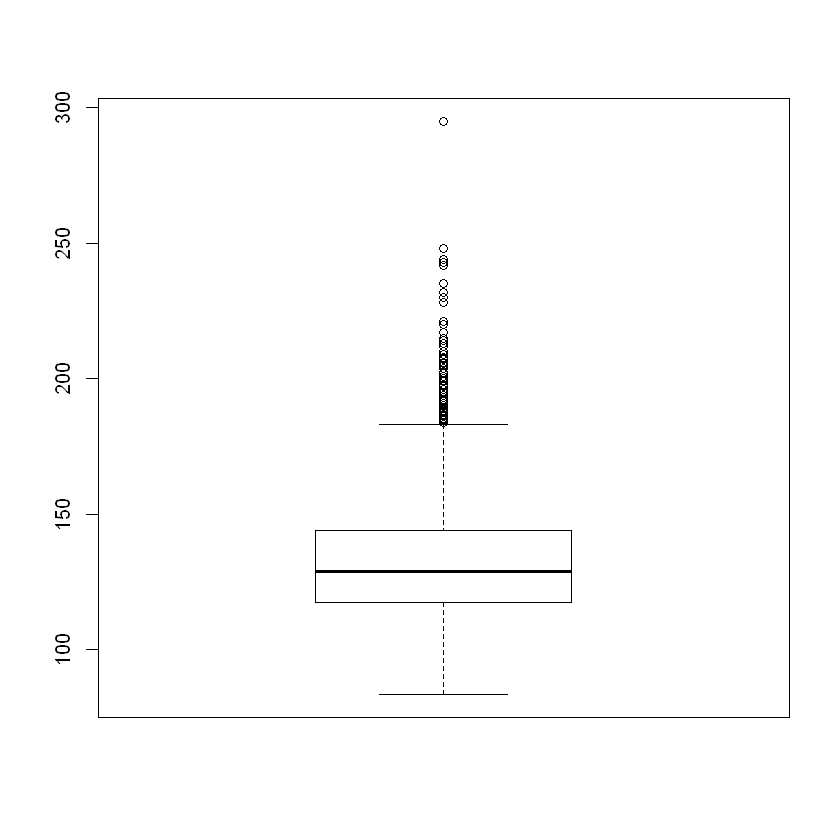

In [14]:
boxplot(frmgham_1visit_data$SYSBP)

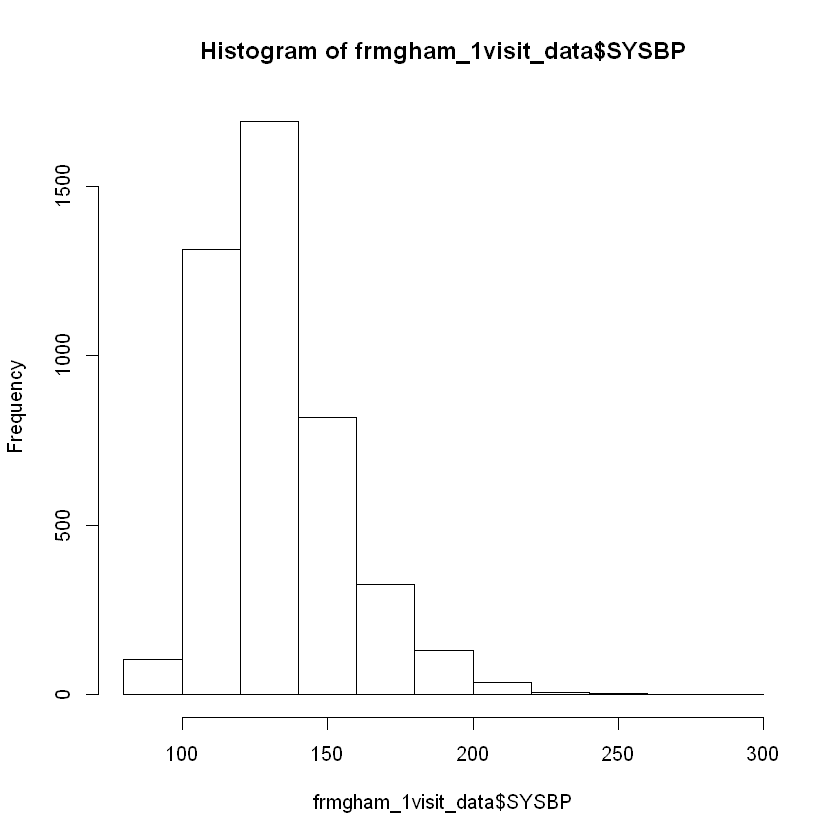

In [15]:
hist(frmgham_1visit_data$SYSBP)

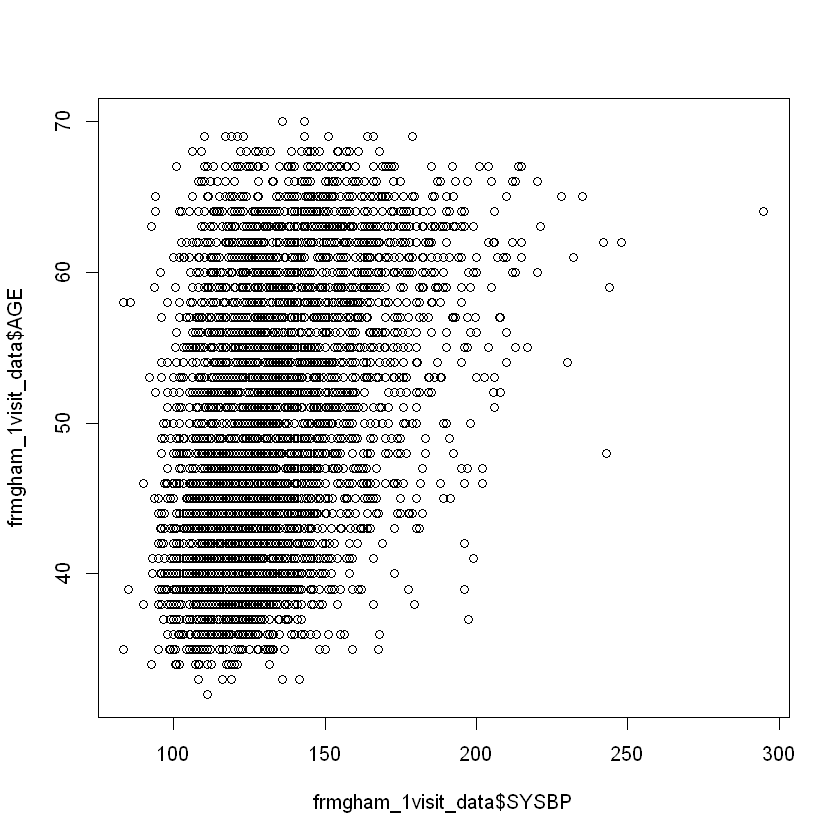

In [16]:
plot(frmgham_1visit_data$SYSBP, frmgham_1visit_data$AGE)

__Activity:__ You might wish to modify the above code (using the empty code cell below) to create similar plots for the other variables. In each case, consider carefully what the output is telling us (and therefore why you might want to condering planning on such plots at the design stage of writing a proposal)

In [ ]:
##You can write R code here, then click the "Run" button in the toolbar at the top to execute your code.

## Summary of the workshop
This workshop activity has just been an introduction to how we can use descriptive statistics to summarise large datasets. Nearly all health research projects will include some form of descriptive statistics. As such, you will usually need to consider what types of summary are relevant for your specific project. Considering both (a) the type of variable, and (b) the measures of location and spread, will be always a good starting point in deciding which is relevant for each individual project. 

While the above concepts might be familiar to many of you, it is worth noting that they are easily overlooked when designing the project, and especially when it comes to analysing the data (it is very tempting to dive straight into complex analysis when we recieve data for an interesting project!). However, descriptive statistics are a vital first step to explore the data (and find potential errors). In most cases, the first pargraph of a statistical analysis plan will include wording such as: "continuous variables will be summarised using the mean/median and variance/interquarile range". The power of describing data before analysing cannot be overstated.

## Notes on some of the above activities
One of the activities above asked you to consider when it is appropriate to use the mean over the median (and vice versa). Sometimes, you need to decide if calculating the mean or median is most appropriate for what you would like determine. The decision is often based on whether a variable is expected to be skewed. Skewed data have a distribution that is not symmetric, which means that the large values do not balance with the small values. For example, consider a dataset where we have collected length of hospital stay. Most people stay in a hospital for a few days. However, some patients have hospital stays for months on end. If you were to report the mean length of stay, this would be inflated by the few very large lengths of stay. Therefore, in this example, you would likely report the median length of hospital stay, which separates the higher half from the lower half. In general, however, most people report the mean unless you have a good reason for not doing so, such as when we have skewed data like in the hospital example above.